In [36]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [5]:
path_to_raw_data = "/home/gp/Datasets/VBZ/fahrzeiten_soll_ist_20180715_20180721.csv"
rawdata = pd.read_csv(path_to_raw_data);
rawdata.head()

,linie,richtung,betriebsdatum,fahrzeug,kurs,seq_von,halt_diva_von,halt_punkt_diva_von,halt_kurz_von1,datum_von,...,fahrweg_id,fw_no,fw_typ,fw_kurz,fw_lang,umlauf_von,halt_id_von,halt_id_nach,halt_punkt_id_von,halt_punkt_id_nach
0,2,1,15.07.18,2083,6,1,6030,0,DEP4,15.07.18,...,79519,15,2,15,DEP4 - KALK,162622,2251,1906,32451,10563
1,2,1,15.07.18,3034,3,1,478,0,BEZI,15.07.18,...,79515,11,1,11,BEZI - BTIE für Ausfahrt,160677,1306,1502,32822,32369
2,2,1,15.07.18,3034,3,5,601,0,BOES,15.07.18,...,79515,11,1,11,BEZI - BTIE für Ausfahrt,160677,2228,2590,32880,33358
3,2,1,15.07.18,3034,3,4,1861,0,PARA,15.07.18,...,79515,11,1,11,BEZI - BTIE für Ausfahrt,160677,1528,2228,32123,32880
4,2,1,15.07.18,3034,3,3,2396,0,SIHS,15.07.18,...,79515,11,1,11,BEZI - BTIE für Ausfahrt,160677,2657,1528,10574,32123


In [6]:
path_to_haltestellen = '/home/gp/Datasets/VBZ/haltestelle.csv';
haltestellen_data = pd.read_csv(path_to_haltestellen);
haltestellen_data.head()

,halt_id,halt_diva,halt_kurz,halt_lang,halt_ist_aktiv
0,143,2570,BirmSte,"Birmensdorf ZH, Sternen/WSL",True
1,309,3356,WaldBir,"Waldegg, Birmensdorferstrasse",True
2,373,6232,FRAF07,"Zürich Flughafen, Fracht",True
3,539,2655,TBAH01,"Thalwil, Bahnhof",True
4,588,3027,FLUG07,"Zürich Flughafen, Bahnhof",True


In [40]:
rawdata['verspaetung_in_sec'] = rawdata.verspaetung_datetime.apply(lambda d:d.total_seconds());

In [29]:
def datetime_from_date_and_seconds(date_str,seconds):
    date_lst = [int(d) for d in date_str.split('.')[::-1]];
    date = datetime.datetime(date_lst[0]+2000,date_lst[1],date_lst[2]);
    return date + datetime.timedelta(seconds = seconds)

In [41]:
rawdata[['linie','ist_an_von','soll_an_von','ankunft_ist','ankunft_soll','verspaetung_in_sec']].head()

,linie,ist_an_von,soll_an_von,ankunft_ist,ankunft_soll,verspaetung_in_sec
0,2,17611,17580,2018-07-15 04:53:31,2018-07-15 04:53:00,31.0
1,2,17815,17802,2018-07-15 04:56:55,2018-07-15 04:56:42,13.0
2,2,18211,18222,2018-07-15 05:03:31,2018-07-15 05:03:42,-11.0
3,2,18121,18156,2018-07-15 05:02:01,2018-07-15 05:02:36,-35.0
4,2,18026,18054,2018-07-15 05:00:26,2018-07-15 05:00:54,-28.0


In [30]:
rawdata['ankunft_soll'] = pd.Series([datetime_from_date_and_seconds(d,s) for (d,s) in zip(rawdata['betriebsdatum'].tolist(),rawdata['soll_an_von'].tolist())]);
rawdata['ankunft_ist'] = pd.Series([datetime_from_date_and_seconds(d,s) for (d,s) in zip(rawdata['betriebsdatum'].tolist(),rawdata['ist_an_von'].tolist())])

In [32]:
rawdata['verspaetung_datetime'] = rawdata['ankunft_ist'] - rawdata['ankunft_soll'];

In [33]:
rawdata[['linie','ankunft_ist','ankunft_soll','verspaetung_datetime']].head()

,linie,ankunft_ist,ankunft_soll,verspaetung_datetime
0,2,2018-07-15 04:53:31,2018-07-15 04:53:00,00:00:31
1,2,2018-07-15 04:56:55,2018-07-15 04:56:42,00:00:13
2,2,2018-07-15 05:03:31,2018-07-15 05:03:42,-1 days +23:59:49
3,2,2018-07-15 05:02:01,2018-07-15 05:02:36,-1 days +23:59:25
4,2,2018-07-15 05:00:26,2018-07-15 05:00:54,-1 days +23:59:32


In [47]:
rawdata.iloc[rawdata.verspaetung_in_sec.idxmin()]


linie                                    15
richtung                                  2
betriebsdatum                      20.07.18
fahrzeug                               2007
kurs                                      4
seq_von                                   1
halt_diva_von                          6033
halt_punkt_diva_von                       0
halt_kurz_von1                         DEP8
datum_von                          20.07.18
soll_an_von                           20160
ist_an_von                             1189
soll_ab_von                           20160
ist_ab_von                            20107
seq_nach                                  2
halt_diva_nach                         2572
halt_punkt_diva_nach                      1
halt_kurz_nach1                        SOER
datum_nach                         20.07.18
soll_an_nach                          20310
ist_an_nach1                          20254
soll_ab_nach                          20310
ist_ab_nach                     

(array([316., 243., 178.,  99.,  76.,  57.,  38.,  31.,  48.,   6.,   4.,
          7.,   3.,   1.,  13.,   1.,   5.,  10.,   3.,   4.,   3.,  14.,
          7.,   6.,   1.,  18.,  11.,   6.,   3.,   7.,   0.,   0.,   0.,
          0.,   0.,   0.,   3.,   4.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,  11.,   4.,
          9.]),
 array([ 601.  ,  659.12,  717.24,  775.36,  833.48,  891.6 ,  949.72,
        1007.84, 1065.96, 1124.08, 1182.2 , 1240.32, 1298.44, 1356.56,
        1414.68, 1472.8 , 1530.92, 1589.04, 1647.16, 1705.28, 1763.4 ,
        1821.52, 1879.64, 1937.76, 1995.88, 2054.  , 2112.12, 2170.24,
        2228.36, 2286.48, 2344.6 ,

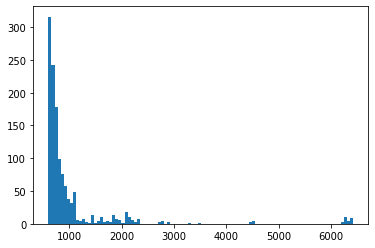

In [55]:
s = rawdata['verspaetung_in_sec'];
plt.hist(s[s>-3600][s>600].tolist(),100)